<a target="_blank" href="https://colab.research.google.com/github/Detroxsys/RP-2023-2/blob/main/Laboratorios/Lab01%20Funciones%20de%20Decisi%C3%B3n%20Lineales/Lab01_Funciones_de_Decisi%C3%B3n.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Laboratorio 01: Clasificación utilizando Funciones de Decisión


En cada uno de los siguientes ejercicios se genero un dataset para clasificar utilizando  [Samples generator](https://scikit-learn.org/stable/modules/classes.html#samples-generator) de la biblioteca Sklearn. Se debe encontrar una función o funciones de decisión que permitan separar completamente todas las clases mostradas. Considerando lo siguiente: 

1.   De ser posible utilizar funciones lineales en caso contrario argumentar el por qué es necesaria una función no lineal. 
2.   Utilizar el menor número de funciones de decisión posible. 
3. De ser posible utilizar separación absoluta antes que separación por pares. De no ser posible argumentar el por qué. 
4. Guiarse del ejemplo para solucionar cada caso. 

In [176]:
#LIBRERÍAS 
# Manipulación de arreglos numéricos
import numpy as np 
# Para construcción de datasets 
from sklearn.datasets import make_blobs, make_circles, make_moons

# Métrica para evaluar la clasificación
from sklearn.metrics import accuracy_score

#Para graficar 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

## Ejemplo 01

En este ejemplo se tiene una muestra de 100 observaciones divididas en dos clases. 

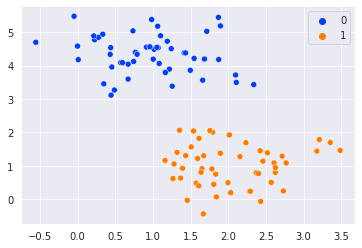

In [177]:
#Conjunto de Datos
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std =0.6, random_state=0)
#X : Numpy array con los patrones de cada clase. 
#y : Etiqueta a la que pertenece cada patron. 
#Graficamos
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette = 'bright')

Notamos que las clases pueden ser separadas por medio de una recta. En particular una recta que funciona es: 

$$x_1 = 0.7x_0 +1.3$$

La función de decisión queda definida como: 

$$d(\overline{x}) = -1.3 -0.7x_0 +x_1$$

Si consideramos que las clases son $C_0$ (azul) y $C_1$ (naranja). Entonces se tiene la siguiente regla de decisión: 



*   $d(\overline{x}) < 0$ para todo $\overline{x} \in C_1$
*   $d(\overline{x}) > 0$ para todo $\overline{x} \in C_2$ 



In [178]:
#Definiendo la función de decisión
def f1(x): 
  """
    Función de Decisión para el ejemplo 01
      Parámetros:
          x: Numpy array de dimensión dos. 
  """
  return -1.3 -0.7*x[0] + x[1]

def classifier(X, df): 
  """
    Función que clasifica la muestra de este ejemplo acorde a la función de decisión
      Parámetros: 
        X: Numpy ndarray con todos los patrones a considerar
        df: Función de clasificación. 
  """
  classif = [] #Arreglo con la clasificación resultante de todos los patrones
  for x in X: 
    if df(x)<0: 
      classif.append(1)
    else: 
      classif.append(0)
  return classif

Una forma rápida de verificar que la respuesta es correcta es utilizando **accuracy_score** y compararlo con las clases que estan en el arreglo **y**

In [179]:
accuracy_score(y, classifier(X, f1))

1.0

Finalmente graficamos para ver visualmente como la función separa ambas clases. 

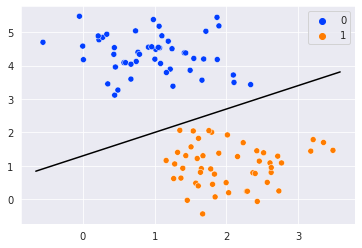

In [180]:
#Graficamos
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette = 'bright')
x0 = np.linspace(np.min(X[:,0])-0.1, np.max(X[:,0])+0.1, 100)
x1 = 0.7*x0 +1.3
sns.lineplot(x=x0, y=x1, color='black')

## Ejercicio 01 (0.5 puntos)

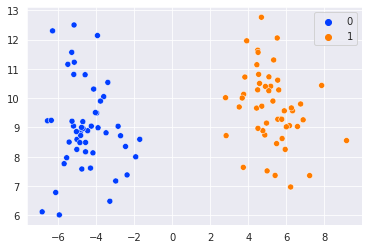

In [181]:
#Conjunto de Datos
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std =1.3, random_state=31)
#Graficamos
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette = 'bright')

## Ejercicio 02 (1.5 puntos)

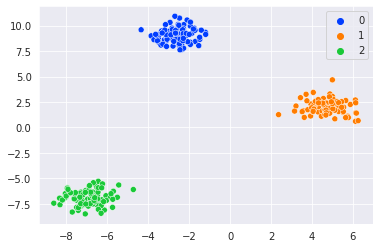

In [182]:
#Conjunto de Datos
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std =0.7, random_state=42)
#Graficamos
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette = 'bright')

## Ejercicio 03 (1.5 puntos)

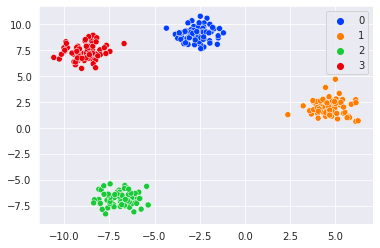

In [183]:
#Conjunto de Datos
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std =0.7, random_state=42)
#Graficamos
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette = 'bright')

## Ejercicio 04 (2 puntos)

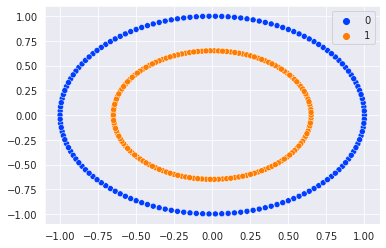

In [184]:
#Conjunto de Datos
X, y = make_circles(n_samples=300, factor=0.65, random_state=31)
#Graficamos
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette = 'bright')

## Ejercicio 05 (3 puntos)

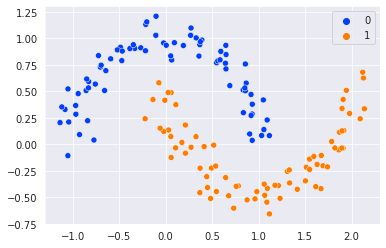

In [185]:
#Conjunto de Datos
X, y = make_moons(n_samples=150, noise=0.1, random_state=42)
#Graficamos
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette = 'bright')

## Ejercicio 06 (1.5 puntos)

In [186]:
#Conjunto de Datos
X, y = make_blobs(n_samples=100, n_features=3, centers=2, cluster_std =1.1, random_state=0)
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2],
              color=[str(i) for i in y])
fig.show()